<a href="https://colab.research.google.com/github/diegoflorescba/MentoriaCripto2022-Grupo2/blob/main/Matias_Mentoria_1_Analisis_Y_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 1 -  Análisis y Visualización

## Introducción

En el mundo de las finanzas tradicionales, el rendimiento de los activos puede variar bajo diferentes condiciones de mercado, es entonces cuando entra en juego la diversificación. La finalidad de la exposición a diferentes clases de activos es equilibrar el riesgo y el rendimiento de una cartera.

Cuando hablamos de cripto activos, la diversificación también es una de las formas de gestionar la exposición al riesgo. Sin embargo, la alta correlación entre algunos activos y su volatilidad, dificulta la selección de una cartera equilibrada. A pesar de ello, con un portafolio cuidadosamente seleccionado de monedas alternativas, junto con algunas monedas estables, se podría invertir en el mercado de manera más efectiva con un riesgo manejable.
El objetivo principal de este proyecto es determinar una forma de seleccionar algunos activos para nuestra cartera, tomados de un conjunto más amplio, según los momentos de mercado. Para ello echaremos mano del análisis técnico, que nos ayudará a estudiar el comportamiento del precio de los activos.

En este primer práctico se pretende obtener un primer acercamiento a los datos. En primer lugar se cargan y presentan brevemente los datos, luego se proponen las consignas a seguir para la resolución del mismo.

### 📌 Carga del dataset 

Primero, se comienza importando las librerías necesarias. Luego, cargamos un único dataset, pero recuerden que en la carpeta **data** tenemos un dataset por cada activo disponible.

In [22]:
import pandas as pd
import seaborn
#librerías extra para ploteo de candlesticks
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np

In [23]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [24]:
from locale import normalize
# Los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice
#url_0="/content/gdrive/MyDrive/Colab Notebooks/Diplomatura/Mentoria/data/BTCUSDT.csv"
url_0="https://raw.githubusercontent.com/diegoflorescba/MentoriaCripto2022-Grupo2/main/data/BCHUSDT.csv"
#url_1="/content/gdrive/MyDrive/Colab Notebooks/Diplomatura/Mentoria/data/COMPUSDT.csv"
url_1="https://raw.githubusercontent.com/diegoflorescba/MentoriaCripto2022-Grupo2/main/data/LUNAUSDT.csv"
#url_2="/content/gdrive/MyDrive/Colab Notebooks/Diplomatura/Mentoria/data/DASHUSDT.csv"
url_2="https://raw.githubusercontent.com/diegoflorescba/MentoriaCripto2022-Grupo2/main/data/DASHUSDT.csv"
#url_3="/content/gdrive/MyDrive/Colab Notebooks/Diplomatura/Mentoria/data/DOGEUSDT.csv"
url_3="https://raw.githubusercontent.com/diegoflorescba/MentoriaCripto2022-Grupo2/main/data/DOGEUSDT.csv"
#url_4="/content/gdrive/MyDrive/Colab Notebooks/Diplomatura/Mentoria/data/DOTUSDT.csv"
url_4="https://raw.githubusercontent.com/diegoflorescba/MentoriaCripto2022-Grupo2/main/data/DOTUSDT.csv"
df_0= pd.read_csv(url_0, index_col=0, parse_dates=True, dayfirst= True)
df_1= pd.read_csv(url_1, index_col=0, parse_dates=True, dayfirst= True)
df_2= pd.read_csv(url_2, index_col=0, parse_dates=True, dayfirst= True)
df_3= pd.read_csv(url_3, index_col=0, parse_dates=True, dayfirst= True)
df_4= pd.read_csv(url_4, index_col=0, parse_dates=True, dayfirst= True)


In [25]:
df_0.head()

,open,high,low,close,volume
date,,,,,
2019-11-28 08:00:00,218.98,219.40,216.57,218.67,2354.90248
2019-11-28 12:00:00,218.35,222.30,218.24,219.76,3330.57932
2019-11-28 16:00:00,219.76,221.00,216.36,216.99,3775.43806
2019-11-28 20:00:00,217.08,218.94,215.96,218.32,2255.83316
2019-11-29 00:00:00,218.34,220.73,218.34,219.36,4504.80547


In [26]:
df_0.tail()

,open,high,low,close,volume
date,,,,,
2022-05-04 20:00:00,297.8,302.6,297.7,302.5,6806.347
2022-05-05 00:00:00,302.4,302.5,297.7,298.0,4878.730
2022-05-05 04:00:00,298.1,300.5,296.8,298.6,8262.009
2022-05-05 08:00:00,298.5,299.3,287.8,288.4,16788.971
2022-05-05 12:00:00,288.4,NaN,NaN,NaN,NaN


**Candlestick charts**

Este tipo de gráficos se utiliza como una herramienta para visualizar y analizar el movimiento de los precios a lo largo del tiempo. Nos muestra la información de los precios de OHLC (open, high, low, close) en cada una de las sesiones (una sesión es un periodo de tiempo definido, en nuestro caso 1 hora.)

In [27]:
df_sample = df_4["2021"]

trace = go.Candlestick(x=df_sample.index,
                open=df_sample.open,
                high=df_sample.high,
                low=df_sample.low,
                close=df_sample.close)
data = [trace]
iplot(data, filename='simple_candlestick')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



#### Variables

- __Fecha__: se la usa como índice del _pandasDataFrame_.

#### Activos

Todos los activos están expresados en una misma moneda, *quote*, que en nuestro caso es USDT (un token de USD)


#### ¿Cuándo opera el mercado?

Este es un mercado que trabaja 24/7, es decir, está operando constantemente. En cada caso tenemos datos por hora (por lo tanto, una sesión equivale a una hora) de los diferentes precios **OHLC** de cada activo y el volumen, a saber:

- **OPEN :** precio al cual abre el activo, en la sesión.
- **HIGH :** mayor precio alcanzado por el activo en la sesión.
- **LOW :** menor precio alcanzado por el activo en la sesión.
- **CLOSE :** precio del activo al momento de cerrar la sesión. 
- **VOLUMEN :** cantidad del activo operado en la sesión.

Para conocer más sobre estos proyectos, pueden visitar la página [CoinMarketCap](https://coinmarketcap.com/). Allí encontrarán datos interesantes sobre cada par, su posición en el mercado, nacimiento de cada proyecto, entre otros.

# 📖 ¡Actividades! 

El objetivo general del práctico es realizar un análsis exploratorio del comportamiento de los __activos__ propuestos.
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. 

A continuación comparto algunos links que puede ser de ayuda para el abordaje de nuestro problema.

- [Tutorial: Time Series analysis with pandas](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/)
- [Kaggle : Everything you can do with a time series](https://www.kaggle.com/thebrownviking20/everything-you-can-do-with-a-time-series)
- [Kaggle: Time series analysis in Python](https://www.kaggle.com/kashnitsky/topic-9-part-1-time-series-analysis-in-python)

***Sugerencia*** Si creemos que repetiremos un bloque de código varias veces, entonces será bueno modularizar esos bloques dentro de funciones.

## Parte I

Se proponen las siguientes actividades:


- Determinen el tipo de variables y el período de tiempo bajo análisis. ¿El periodo es el mismo para todos los activos?


- Indaguen sobre la existencia de valores faltantes. Para discutir, ¿cómo tratarían a los faltantes? ¿por qué? 


- Analicen las distribuciones por medio de gráficos y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación). Pueden pensar en una ventana de tiempo móvil para calcular dichas medidas (indaguen el método `.rolling()`). **(AA)**


- ¿Hay outliers?  **(AA)**


- Seleccionen algunos activos y grafiquen un boxplot con los datos de cada mes (y/o semana). ¿La distribución se mantiene constante en el tiempo?  **(AA)**


- Exploren la existencia de estacionalidad.  **(AA)**


- Estudien la evolución temporal de los activos. ¿En qué sentido tienden a moverse? ¿Detectan períodos de crisis? ¿Los activos tienden a moverse en forma conjunta?  En caso de que existan crisis, ¿son globales o individuales? Para poder realizar una mejor comparación, deberán normalizar los datos. 

## Parte II

Que el precio de un activo sea mayor al de otro no significa que el primero sea una mejor inversión, entonces, el análisis de este tipo de series se centra por lo general en el cambio porcentual de los precios en vez del cambio en los valores absolutos. Esto resulta en que en vez de modelar los precios de los activos, previamente se habitúa realizar una transformación logarítmica o trabajar con la tasa de rendimiento. 


- Calculen los logaritmos naturales de los precios de los activos y la serie de tasas de rendimiento (para ello explorar el método `.pct_change()`). Muestren graficamente algunos de ellos.


- Realicen nuevamente un análisis de las distribuciones por medio de gráficos y medidas de estadística descriptiva con las nuevas series. **(AA)**


- Exploren la volatilidad de las series, por ejemplo graficando las desviaciones estándar móviles. **(AA)**


**(AA)**: Algunos activos.

## Opcional


**¿Los días de la semana influyen en el precio de los activos?**

Según un [estudio realizado](https://www.sciencedirect.com/science/article/pii/S1544612318304240), los valores de Bitcoin son significativamente más altos los días lunes. ¿Qué pueden decir al respecto? 

Agrupen los datos de acuerdo a los días de la semana y exploren la estacionalidad diaria. Comparen los gráficos de Bitcoin con el de otro activos. 

# Fecha de entrega

- __Versión preliminar: 20/5__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

In [28]:
#Vemos primero si existen datos faltantes
def status(data):
    data2=data
    # total de rows
    tot_rows=len(data2)
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'q_nan']
    # percentage of nan
    d2[['p_nan']]=d2[['q_nan']]/tot_rows
    # num of zeros
    d2['q_zeros']=(data2==0).sum().values
    # perc of zeros
    d2['p_zeros']=d2[['q_zeros']]/tot_rows
    # total unique values
    d2['unique']=data2.nunique().values
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    return(d2)
status(df_2)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,open,0,0.000000,0,0.0,4930,float64
1,high,16,0.002356,0,0.0,4859,float64
2,low,16,0.002356,0,0.0,4806,float64
3,close,16,0.002356,0,0.0,4922,float64
4,volume,16,0.002356,0,0.0,6776,float64


In [29]:
#Aplicamos una funcion que limpia el dataframe si este tiene elementos NAN dentro de si mismo
#Vemos si es posible limpiarlo 
def clean_coin(data):
  data_clean=data
  if data.isnull().values.any():
    data_clean=data.fillna(method="ffill")
    return (data_clean)
  else:
    return (data_clean)

df_0=clean_coin (df_0)
df_1=clean_coin (df_1)
df_2=clean_coin (df_2)
df_3=clean_coin (df_3)
df_4=clean_coin (df_4)
#Luego de limpiar, lo ideal es normalizar los dataframes para tener una comparativa de cuánto suben en proporción. 

def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min_open = df['open'].min()
    max_open = df['open'].max()
    x_open = df['open'] 

    y_open = (x_open-min_open)/(max_open-min_open)

    min_close = df['close'].min()
    max_close = df['close'].max()
    x_close = df['close'] 

    y_close = (x_close-min_close)/(max_close-min_close)

    min_high = df['high'].min()
    max_high = df['high'].max()
    x_high = df['high'] 

    y_high = (x_high)/(max_high-min_high)

    min_low = df['low'].min()
    max_low = df['low'].max()
    x_low = df['low'] 

    y_low = (x_low- min_low)/(max_low -min_low )

    min_volume = df['volume'].min()
    max_volume = df['volume'].max()
    x_volume = df['volume'] 

    y_volume = (x_volume-min_volume)/(max_volume-min_volume)
    #df["open"].replace(y_open)
    #df["close"].replace(y_close)
    #df["high"].replace(y_high)
    #df["low"].replace(y_low)
    #df["volume"].replace(y_volume)
    df["open"]=(y_open)
    df["close"]=(y_close)
    df["high"]=(y_high)
    df["low"]=(y_low)
    df["volume"]=(y_volume)

    
    return df
df_0_norm=normalize_data(df_0)
df_1_norm=normalize_data(df_1)
df_2_norm=normalize_data(df_2)
df_3_norm=normalize_data(df_3)
df_4_norm=normalize_data(df_4)

In [30]:
names=df_0.columns
#Con la siguiente función el problema que me devuelve es que el dataframe no tiene fecha
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df_0)
scaled_df = pd.DataFrame(d)

scaled_df

,0,1,2,3,4
0,0.049614,0.034579,0.063073,0.049417,0.003245
1,0.049174,0.036536,0.064276,0.050178,0.005864
2,0.050158,0.035658,0.062922,0.048244,0.007058
3,0.048288,0.034268,0.062634,0.049173,0.002979
4,0.049167,0.035476,0.064348,0.049899,0.009016
...,...,...,...,...,...
5323,0.104622,0.090725,0.121508,0.107945,0.015194
5324,0.107833,0.090658,0.121508,0.104803,0.010020
5325,0.104832,0.089308,0.120859,0.105222,0.019102
5326,0.105111,0.088498,0.114377,0.098101,0.041992


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



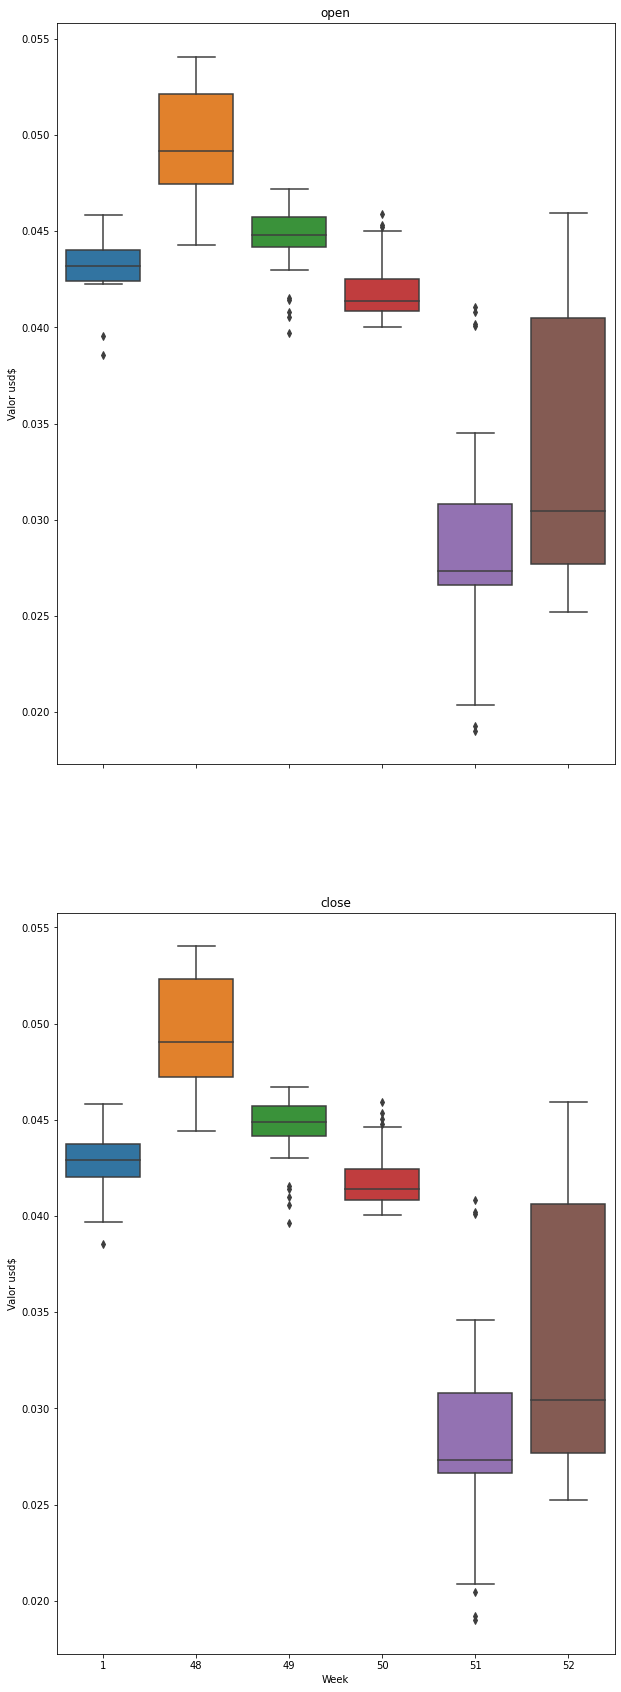

In [31]:

# Add columns with year, month, and weekday name
df_0['Year'] = df_0.index.year
df_0['Month'] = df_0.index.month
df_0['Week'] = df_0.index.week
# Display a random sampling of 5 rows
df_0.sample(5, random_state=0)
#para el caso de x=year solo apareceran 4 boxplot, pero por el contrario si lo ponemos por 
#week o month solo apareceran los de un año en particular. 
#Para seleccionar el año, lo que tenemos q poner es ["year"] dentro del codigo de seaborn
#de ahi saale el año y el tipo de variable, ya sea day, month o week
fig, axes = plt.subplots(2, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['open', 'close'], axes):
  seaborn.boxplot(data=df_0["2019"], x='Week', y=name, ax=ax)
  ax.set_ylabel('Valor usd$')
  ax.set_title(name)
  # Remove the automatic x-axis label from all but the bottom subplot
  if ax != axes[-1]:
        ax.set_xlabel('')

falta


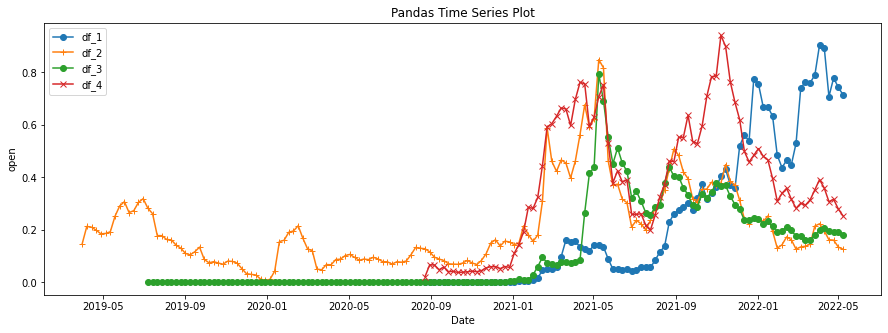

Error


In [32]:
#Calculamos la media de cada semana y mes
df_monthly = df_0.resample('M').mean()
df_monthly

def plot_df (data_1,data_2,data_3,data_4,col, period,variable):
  # Plot Year
  if period=="Y" and variable=="mean" :
    data_1=data_1.resample("Y").mean()
    data_2=data_2.resample("Y").mean()
    data_3=data_3.resample("Y").mean()
    data_4=data_4.resample("Y").mean()
  if period=="Y" and variable=="var" :
    data_1=data_1.resample("Y").var()
    data_2=data_2.resample("Y").var()
    data_3=data_3.resample("Y").var()
    data_4=data_4.resample("Y").var()
  if period=="M" and variable=="mean" :
    data_1=data_1.resample("M").mean()
    data_2=data_2.resample("M").mean()
    data_3=data_3.resample("M").mean()
    data_4=data_4.resample("M").mean()
  if period=="M" and variable=="var" :
    data_1=data_1.resample("M").var()
    data_2=data_2.resample("M").var()
    data_3=data_3.resample("M").var()
    data_4=data_4.resample("M").var()
  if period=="W" and variable=="mean":
    data_1=data_1.resample("W").mean()
    data_2=data_2.resample("W").mean()
    data_3=data_3.resample("W").mean()
    data_4=data_4.resample("W").mean()
  if period=="W" and variable=="var":
    data_1=data_1.resample("W").var()
    data_2=data_2.resample("W").var()
    data_3=data_3.resample("W").var()
    data_4=data_4.resample("W").var()
  else:
    print ('falta')

    
 # plt.figure(figsize=(15,5))
  #plt.plot(data["open"], marker='o',label="open")
  #plt.plot(data["close"], marker='+',label="close")
#  plt.plot(data["high"], marker='o',label="high")
 # plt.plot(data["low"], marker='x',label="low")
  # Labelling 
  #plt.xlabel("Date")
  #plt.ylabel("open")
  #plt.title("Pandas Time Series Plot")
  #plt.legend()
  # Display
 # plt.show()
  
  #Prueba con multiples
  if col=="open":
    plt.figure(figsize=(15,5))
    plt.plot(data_1["open"], marker='o',label="df_1")
    plt.plot(data_2["open"], marker='+',label="df_2")
    plt.plot(data_3["open"], marker='o',label="df_3")
    plt.plot(data_4["open"], marker='x',label="df_4")
    # Labelling 
    plt.xlabel("Date")
    plt.ylabel("open")
    plt.title("Pandas Time Series Plot")
    plt.legend()# Display
    plt.show()
  if col=="close":
    plt.figure(figsize=(15,5))
    plt.plot(data_1["open"], marker='o',label="df_1")
    plt.plot(data_2["open"], marker='+',label="df_2")
    plt.plot(data_3["open"], marker='o',label="df_3")
    plt.plot(data_4["open"], marker='x',label="df_4")
    # Labelling 
    plt.xlabel("Date")
    plt.ylabel("open")
    plt.title("Pandas Time Series Plot")
    plt.legend()# Display
    plt.show()
  if col=="high":
    plt.figure(figsize=(15,5))
    plt.plot(data_1["open"], marker='o',label="df_1")
    plt.plot(data_2["open"], marker='+',label="df_2")
    plt.plot(data_3["open"], marker='o',label="df_3")
    plt.plot(data_4["open"], marker='x',label="df_4")
    # Labelling 
    plt.xlabel("Date")
    plt.ylabel("open")
    plt.title("Pandas Time Series Plot")
    plt.legend()# Display
    plt.show()
  if col=="low":
    plt.figure(figsize=(15,5))
    plt.plot(data_1["open"], marker='o',label="df_1")
    plt.plot(data_2["open"], marker='+',label="df_2")
    plt.plot(data_3["open"], marker='o',label="df_3")
    plt.plot(data_4["open"], marker='x',label="df_4")
    # Labelling 
    plt.xlabel("Date")
    plt.ylabel("open")
    plt.title("Pandas Time Series Plot")
    plt.legend()# Display
    plt.show()
  if col=="volume":
    plt.figure(figsize=(15,5))
    plt.plot(data_1["open"], marker='o',label="df_1")
    plt.plot(data_2["open"], marker='+',label="df_2")
    plt.plot(data_3["open"], marker='o',label="df_3")
    plt.plot(data_4["open"], marker='x',label="df_4")
    # Labelling 
    plt.xlabel("Date")
    plt.ylabel("open")
    plt.title("Pandas Time Series Plot")
    plt.legend()# Display
    plt.show()
  else:
    print ("Error")


plot_df(df_1,df_2,df_3,df_4,"close","W","mean")      


In [33]:
seaborn.lineplot(data=df_4, x='Week', y='open')
plt.xticks(rotation=45);

ValueError: ignored

In [ ]:
seaborn.histplot( )